In [34]:
from maze_solver import *
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from neural_network_class import NeuralNetwork


## 2.1) ENTRENAMIENTO DE LA RED NEURONAL

 - Green (grama) -> Weight: 2
 - Yellow (arena) -> Weight: 3
 - Blue (agua) -> Weight: 9
 - Grey (pavimento) -> Weight: 1
 - Pink (chicle) -> Weight: 10

In [24]:
df = pd.read_csv("data/final_data_colors.csv")

print(f"Primeras 10 filas:\n{df.head(10)}")
print(f"Tipos de datos:\n{df.dtypes}")
print(f"Etiquetas únicas:\n{df['label'].unique()}")
print(f"Conteo por etiqueta:\n{df['label'].value_counts()}")
print(f"Dimensiones:\n{df.shape}")
print(f"Tipos de datos por columna:\n{df.info()}")


Primeras 10 filas:
   red  green  blue   label
0   20    139   240    Blue
1  174     83    72   Brown
2  144    249   131   Green
3  168     25   156    Pink
4   30    182   136   Green
5  199    150   175    Pink
6  199     93   154    Pink
7  231    243    25  Yellow
8   48    213    76   Green
9   38      3    64    Blue
Tipos de datos:
red       int64
green     int64
blue      int64
label    object
dtype: object
Etiquetas únicas:
['Blue' 'Brown' 'Green' 'Pink' 'Yellow' 'Orange' 'Purple' 'Red' 'Grey'
 'White' 'Black']
Conteo por etiqueta:
label
Green     1457
Blue      1107
Pink       579
Purple     553
Brown      376
Yellow     285
Red        236
Orange     205
Grey       174
Black       51
White       29
Name: count, dtype: int64
Dimensiones:
(5052, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052

In [25]:
df_filtered = df[df["label"].isin(["Green", "Yellow", "Blue", "Grey", "Pink"])]

lb = LabelBinarizer()

# esto lo que hace es convertir las etiquetas de texto a números binarios, por ejemplo:
# Green -> [1, 0, 0, 0, 0]
Y = lb.fit_transform(df_filtered["label"])

print(f"Y shape: {Y.shape}")
print(f"Y sample: {Y[0]}") # type: ignore

X = df_filtered[["red", "green", "blue"]].values
X = X / 255.0
print(f"X shape: {X.shape}")
print(f"X min: {X.min()}, X max: {X.max()}")


Y shape: (3602, 5)
Y sample: [1 0 0 0 0]
X shape: (3602, 3)
X min: 0.0, X max: 0.996078431372549


In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}, Y_test shape: {Y_test.shape}")

print("Distribucion del train:")
for i, label in enumerate(lb.classes_):
    count = Y_train[:, i].sum()
    print(f"Label {label}: {count} samples")

X_train shape: (2881, 3), Y_train shape: (2881, 5)
X_test shape: (721, 3), Y_test shape: (721, 5)
Distribucion del train:
Label Blue: 877 samples
Label Green: 1166 samples
Label Grey: 134 samples
Label Pink: 468 samples
Label Yellow: 236 samples


In [42]:


# Instanciar la red neuronal con arquitectura: 3 → 32 → 16 → 5
nn = NeuralNetwork(layer_sizes=[3, 32, 16, 5])

# Entrenar la red neuronal
print("Iniciando entrenamiento...")
losses = nn.train(X_train, Y_train, epochs=400, learning_rate=0.1, batch_size=32)
print(f"Entrenamiento completado.")


Iniciando entrenamiento...
Epoch 10/400 - Loss: 1.3677
Epoch 20/400 - Loss: 1.3765
Epoch 30/400 - Loss: 0.7164
Epoch 40/400 - Loss: 0.2283
Epoch 50/400 - Loss: 0.1930
Epoch 60/400 - Loss: 0.1774
Epoch 70/400 - Loss: 0.1645
Epoch 80/400 - Loss: 0.1475
Epoch 90/400 - Loss: 0.1471
Epoch 100/400 - Loss: 0.1467
Epoch 110/400 - Loss: 0.1391
Epoch 120/400 - Loss: 0.1461
Epoch 130/400 - Loss: 0.1818
Epoch 140/400 - Loss: 0.1368
Epoch 150/400 - Loss: 0.1379
Epoch 160/400 - Loss: 0.1389
Epoch 170/400 - Loss: 0.1352
Epoch 180/400 - Loss: 0.1330
Epoch 190/400 - Loss: 0.1316
Epoch 200/400 - Loss: 0.1466
Epoch 210/400 - Loss: 0.1299
Epoch 220/400 - Loss: 0.1300
Epoch 230/400 - Loss: 0.1354
Epoch 240/400 - Loss: 0.1427
Epoch 250/400 - Loss: 0.1289
Epoch 260/400 - Loss: 0.1305
Epoch 270/400 - Loss: 0.1308
Epoch 280/400 - Loss: 0.1280
Epoch 290/400 - Loss: 0.1894
Epoch 300/400 - Loss: 0.1288
Epoch 310/400 - Loss: 0.1557
Epoch 320/400 - Loss: 0.1258
Epoch 330/400 - Loss: 0.1693
Epoch 340/400 - Loss: 0.1

In [43]:
# EVALUACIÓN EN TEST SET
# Hacer predicciones en el conjunto de prueba
Y_test_pred, _ = nn.forward(X_test)
predictions = nn.predict(X_test)

# Convertir Y_test one-hot a índices de clases
y_test_true = np.argmax(Y_test, axis=1)

# Calcular accuracy
accuracy = nn.accuracy(predictions, y_test_true)

print(f"\n=== RESULTADOS ===")
print(f"Accuracy en Test Set: {accuracy:.2f}%")
print(f"\nPredicciones (primeras 10):")
for i in range(10):
    pred_class = lb.classes_[predictions[i]]
    true_class = lb.classes_[y_test_true[i]]
    match = "✓" if predictions[i] == y_test_true[i] else "✗"
    print(f"  Sample {i}: Predicción={pred_class}, Real={true_class} {match}")



=== RESULTADOS ===
Accuracy en Test Set: 92.65%

Predicciones (primeras 10):
  Sample 0: Predicción=Blue, Real=Blue ✓
  Sample 1: Predicción=Yellow, Real=Green ✗
  Sample 2: Predicción=Green, Real=Green ✓
  Sample 3: Predicción=Green, Real=Yellow ✗
  Sample 4: Predicción=Blue, Real=Blue ✓
  Sample 5: Predicción=Grey, Real=Green ✗
  Sample 6: Predicción=Green, Real=Green ✓
  Sample 7: Predicción=Blue, Real=Blue ✓
  Sample 8: Predicción=Green, Real=Green ✓
  Sample 9: Predicción=Blue, Real=Blue ✓


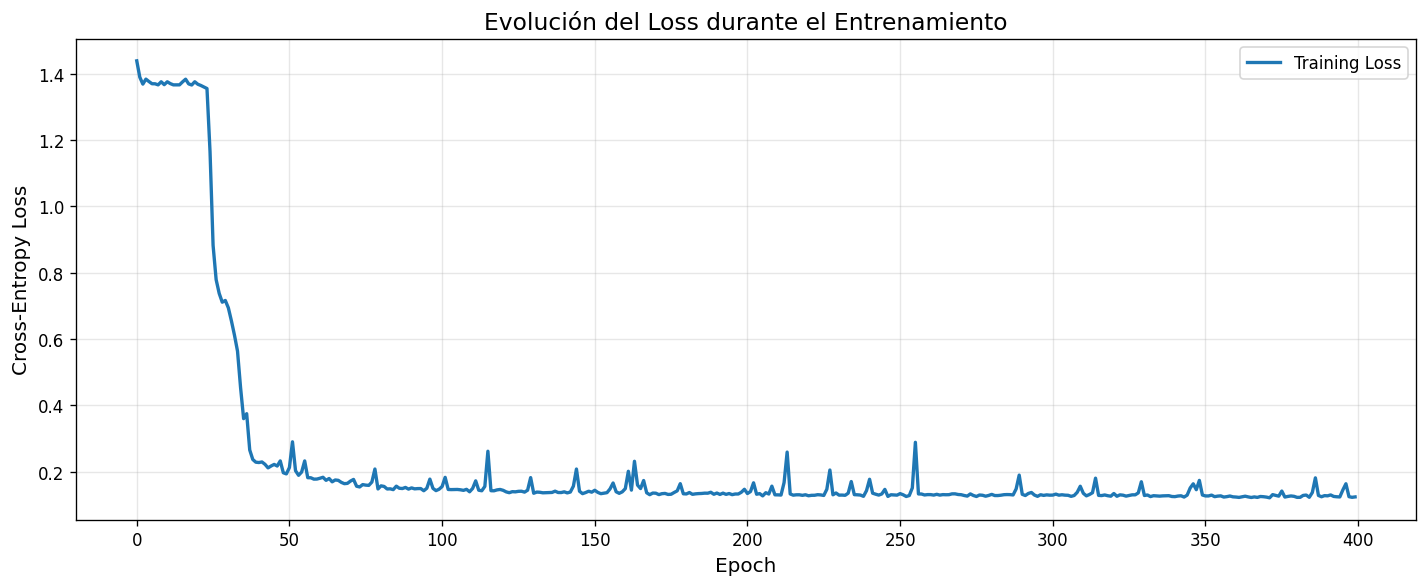

Loss inicial: 1.4395
Loss final: 0.1235
Reducción: 91.42%


In [44]:


# Graficar el loss durante el entrenamiento
plt.figure(figsize=(12, 5))
plt.plot(losses, linewidth=2, label='Training Loss')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Cross-Entropy Loss', fontsize=12)
plt.title('Evolución del Loss durante el Entrenamiento', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Loss inicial: {losses[0]:.4f}")
print(f"Loss final: {losses[-1]:.4f}")
print(f"Reducción: {((losses[0] - losses[-1]) / losses[0] * 100):.2f}%")


## 2.2) INTEGRACIÓN DE LA RED NEURONAL CON A* (Inferencia en Vivo)

Ahora usamos la red neuronal entrenada para calcular **costos dinámicos** durante la búsqueda A*.

### Paso 1: Crear imagen de prueba con dos caminos
- **Camino A**: Corto pero pintado de AZUL (agua, costo alto = 9)
- **Camino B**: Largo pero pintado de GRIS (pavimento, costo bajo = 1)

El robot debe ser lo suficientemente inteligente para elegir el **Camino B** (largo pero rápido).

### Paso 2: Ejecutar A* con costos dinámicos
- Cada vez que A* evalúa un vecino, la red neuronal predice su costo
- A* automáticamente elige la ruta con menor costo total (no la más corta)

### Experimento esperado
- Sin red neuronal: A* elegiría el camino más corto (A)
- **Con red neuronal**: A* elige el camino más barato (B)

In [45]:
# Cargar imagen de prueba desde assets
IMAGE_PATH = os.path.join("assets", "laberinto colores.png")  
img = Image.open(IMAGE_PATH).convert("RGB")
img_array = np.array(img, dtype=np.uint8)

print(f"Imagen cargada: {IMAGE_PATH}")
print(f"Dimensiones: {img_array.shape}")

Imagen cargada: assets\laberinto colores.png
Dimensiones: (528, 538, 3)


In [47]:
# ── Ejecutar discretización ────────────────────────────────────────────────────
TILE_SIZE = 6  # Tamaño de cada tile en píxeles

grid = discretize(img_array, tile_size=TILE_SIZE)
print(f"Grilla discretizada: {grid.shape[0]} filas × {grid.shape[1]} columnas  (tile_size={TILE_SIZE})")

for tile in grid:
    print(tile)

Grilla discretizada: 88 filas × 89 columnas  (tile_size=6)
[<CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WALL: 1> <CellType.WALL: 1> <CellType.WALL: 1>
 <CellType.WA